# Random_forest House Price Prediction

In [2]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
import sklearn

In [3]:
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split

In [4]:
house = pd.read_excel("C:/Users/Harsha Vardhan/Downloads/london_houses.xlsx")

In [8]:
house.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (Â£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [9]:
house.shape

(1000, 17)

In [10]:
house.drop(["Address","Neighborhood"],axis=1,inplace=True)

In [11]:
house.tail()

,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (Â£)
995,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000
999,4,2,185,53,No,No,1,Apartment,Electric Heating,No Balcony,Modern,Street,Wood,Old,2343333


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le_garden = LabelEncoder()

In [16]:

le_garage = LabelEncoder()
le_property = LabelEncoder()
le_heating = LabelEncoder()
le_balcony = LabelEncoder()
le_interior = LabelEncoder()
le_view = LabelEncoder()
le_material = LabelEncoder()
le_building = LabelEncoder()

In [17]:
# adding new column

In [18]:
house["garden"] = le_garden.fit_transform(house["Garden"])

In [19]:
house["garage"] = le_garage.fit_transform(house["Garage"])
house["property"] = le_property.fit_transform(house["Property Type"])
house["heating"] = le_heating.fit_transform(house["Heating Type"])
house["balcony"] = le_balcony.fit_transform(house["Balcony"])
house["interior"] = le_interior.fit_transform(house["Interior Style"])
house["view"] = le_view.fit_transform(house["View"])
house["materials"] = le_material.fit_transform(house["Materials"])
house["building"] = le_building.fit_transform(house["Building Status"])


In [20]:
house.head()

,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,...,Price (Â£),garden,garage,property,heating,balcony,interior,view,materials,building
0,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,...,2291200,0,0,2,1,0,1,1,2,2
1,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,...,1476000,1,0,0,0,0,1,0,1,1
2,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,...,1881600,0,1,2,0,2,1,4,3,2
3,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,...,1896000,1,1,0,3,2,0,2,0,2
4,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,...,1524000,0,1,2,0,2,3,2,3,1


In [21]:
house.drop(["Garden","Garage","Property Type","Heating Type","Balcony","Interior Style","View","Materials","Building Status"],axis=1,inplace=True)

In [22]:
house.tail()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (Â£),garden,garage,property,heating,balcony,interior,view,materials,building
995,1,3,81,4,2,1166400,1,1,2,0,1,3,4,1,2
996,1,1,65,51,1,563333,0,0,0,3,2,1,1,3,1
997,4,1,191,27,2,1986399,0,1,2,0,1,2,2,1,1
998,5,2,131,3,2,1703000,1,0,1,3,0,3,2,1,2
999,4,2,185,53,1,2343333,0,0,0,1,2,3,4,3,1


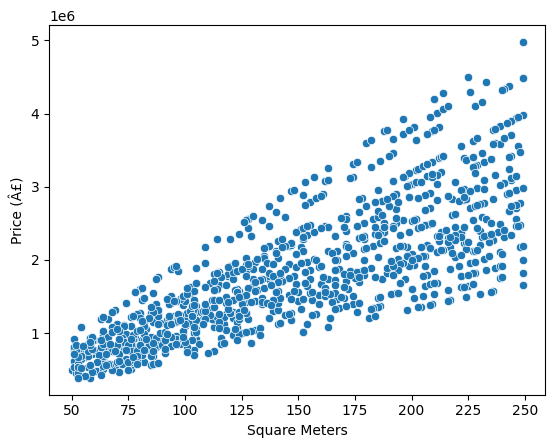

In [35]:
# plotting the data
import matplotlib.pyplot as plt
sns.scatterplot(x="Square Meters",y="Price (Â£)",data=house)
plt.show()

In [49]:
x = house.drop(["Price (Â£)"],axis=1)
y=house["Price (Â£)"]

In [50]:
x

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,garden,garage,property,heating,balcony,interior,view,materials,building
0,2,3,179,72,3,0,0,2,1,0,1,1,2,2
1,2,1,123,34,1,1,0,0,0,0,1,0,1,1
2,5,3,168,38,3,0,1,2,0,2,1,4,3,2
3,5,1,237,53,1,1,1,0,3,2,0,2,0,2
4,4,1,127,23,2,0,1,2,0,2,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3,81,4,2,1,1,2,0,1,3,4,1,2
996,1,1,65,51,1,0,0,0,3,2,1,1,3,1
997,4,1,191,27,2,0,1,2,0,1,2,2,1,1
998,5,2,131,3,2,1,0,1,3,0,3,2,1,2


In [51]:
y

0      2291200
1      1476000
2      1881600
3      1896000
4      1524000
        ...   
995    1166400
996     563333
997    1986399
998    1703000
999    2343333
Name: Price (Â£), Length: 1000, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaler.fit(x)

StandardScaler()

In [56]:
x=scaler.fit_transform(x)

In [57]:
x

array([[-0.7271359 ,  1.23379089,  0.50619395, ..., -0.70439825,
         0.41556246,  1.20807044],
       [-0.7271359 , -1.24121591, -0.45887129, ..., -1.42317198,
        -0.48004629, -0.01097138],
       [ 1.42627742,  1.23379089,  0.31662757, ...,  1.45192293,
         1.3111712 ,  1.20807044],
       ...,
       [ 0.70847298, -1.24121591,  0.71299365, ...,  0.01437547,
        -0.48004629, -0.01097138],
       [ 1.42627742, -0.00371251, -0.32100483, ...,  0.01437547,
        -0.48004629,  1.20807044],
       [ 0.70847298, -0.00371251,  0.6095938 , ...,  1.45192293,
         1.3111712 , -0.01097138]])

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rfr = RandomForestRegressor()

In [64]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
pred=rfr.predict(x_test)

In [74]:
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
r2_score(y_test,pred)

0.7216386759627689

In [76]:
mean_squared_error(y_test,pred)

214229447327.08514

In [ ]:
# selecting the best models from the list of models

In [86]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
import xgboost
from xgboost import XGBRegressor 

In [91]:
models = [LogisticRegression(),Lasso(),SVR(),GradientBoostingRegressor(),XGBRegressor()]

model:   LogisticRegression() 0.065719161787128
model:   Lasso() 0.6208434502585931
model:   SVR() -0.009944823417238569
model:   GradientBoostingRegressor() 0.7338945690142024
model:   XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 0.6435247659683228


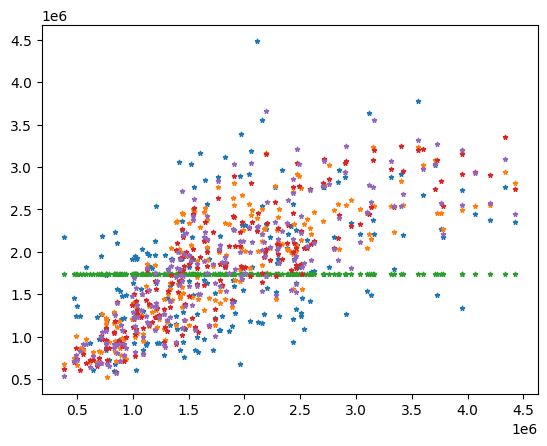

In [115]:
def model_selection():
    for m in models:
        m.fit(x_train,y_train)
        y_pred=m.predict(x_test)
        print("model:"," ",m,r2_score(y_test,y_pred))
        plt.scatter(y_test,y_pred,s=10,marker='*',label=m)
model_selection()

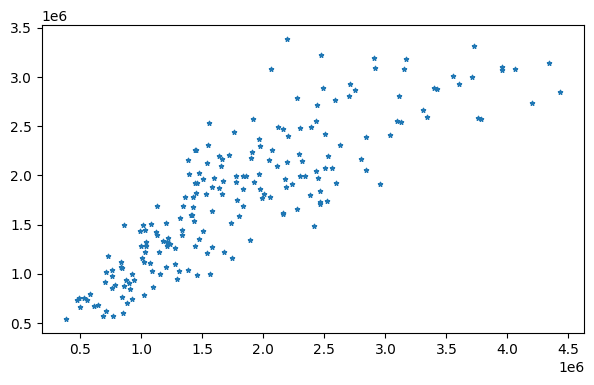

In [112]:
plt.figure(figsize=(7,4))
plt.scatter(y_test,pred,s=10,marker='*')
plt.show()